#  Classifying Subscriber Likelihood in a Minecraft Research Server:  
## A Comparison of Demographic and Behavioral Predictors
---
# 1. Introduction

In the age of data-driven research, real-world projects provide an exciting opportunity to apply statistical methods to practical problems. This project, in collaboration with a research group led by Professor Frank Wood from the Department of Computer Science at the University of British Columbia, investigates player behavior in a video game setting. The group has deployed a Minecraft server to collect gameplay data, recording player activity as they explore and interact with the virtual world. However, maintaining this server-based study requires careful planning — including targeting the right kinds of players for recruitment and ensuring adequate computational resources like licenses and hardware. To support these efforts, one important question arises: **what kinds of players are most likely to subscribe to a game-related newsletter, indicating long-term interest and engagement with the project?**

## 1.1 Research Question

**Which player characteristics — demographic or behavioral — are more predictive of newsletter subscription in a game research environment?**

We aim to explore whether features like age and gender (demographics) or variables such as hours played and experience level (game behavior) better predict a player’s likelihood of subscribing. By doing so, we hope to provide insights that will help the research team optimize recruitment and outreach strategies.

## 1.2 Dataset Overview

The dataset consists of 196 observations and 7 variables, each representing a unique player. The main response variable is:

- `subscribe`: Whether or not the player subscribed to the newsletter (`TRUE` / `FALSE`)

Key explanatory variables used in this analysis are:

- `experience`: Player’s self-reported gaming experience level (e.g., *Beginner, Amateur, Veteran, Pro*)
- `played_hours`: Total hours played on the Minecraft server (numeric)
- `gender`: Player’s gender (e.g., *Male, Female, Non-binary*)
- `Age`: Player’s age in years (numeric)

Other variables such as `hashedEmail` and `name` are excluded from modeling due to privacy concerns or irrelevance for prediction. 

**Important preprocessing considerations include:**
- Encoding categorical variables such as `experience` and `gender`
- Standardizing continuous variables like `Age` and `played_hours`
- Addressing potential class imbalance in the `subscribe` variable

This setup provides a strong foundation for building classification models that can reveal whether demographic or behavioral features are more effective predictors of player subscription behavior.



# 2. Methods and Results

## 2.0 Method Overview

To investigate which player characteristics are most predictive of newsletter subscription, we conducted a supervised classification analysis using the k-nearest neighbors (KNN) algorithm. The primary response variable was `subscribe`, a categorical variable indicating whether a player subscribed to the newsletter (`TRUE` or `FALSE`). Our explanatory variables included both demographic and behavioral features: `age` and `gender` (demographic), and `experience` and `played_hours` (behavioral).

We began by loading and exploring the dataset to understand its structure and check for missing values or inconsistencies. Categorical variables (`gender` and `experience`) were converted to numerical format using one-hot encoding, while continuous variables (`age` and `played_hours`) were standardized to ensure that all predictors contributed equally in the KNN distance calculations.

To evaluate model performance, we split the dataset into a training set (75%) and a testing set (25%). We used 10-fold cross-validation on the training set to tune the number of neighbors (K) for the KNN classifier, selecting the value of K that minimized classification error. The final model was trained using this optimal K, and predictions were made on the test set.

To compare the predictive strength of different types of features, we built and evaluated three models:
1. A model using only demographic features (`age` and `gender`)
2. A model using only behavioral features (`experience` and `played_hours`)
3. A model using all four features combined

For each model, we calculated key classification metrics on the test set — including accuracy, precision, recall, and F1 score — to determine which feature group provided the most reliable prediction of newsletter subscription.


## 2.1 Loading Libraries
Libraries used for this project include
- **repr**: Allows customization of output size in Jupyter notebooks, especially useful for adjusting the resolution and dimensions of plots to improve readability.
- **tidyverse**: A collection of essential R packages for data science that simplifies data import, cleaning, manipulation, and visualization. It includes core tools like `dplyr`, `ggplot2`, and `readr`.
- **tidymodels**: A unified framework for building, tuning, and evaluating machine learning models in a tidy and consistent way. It integrates preprocessing, model training, and performance evaluation into a streamlined workflow.

In [1]:
# Load core data science tools
library(repr)
library(tidyverse)
library(tidymodels) 
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 2.2 Loading Data
We begin our analysis by loading the dataset using the `read_csv()` function from the `readr` package, which is part of the `tidyverse`. Since the file is a **CSV (comma-separated values)** file, `read_csv()` is the appropriate function for reading in structured tabular data.

We use a **relative file path** (`"data/players.csv"`) to ensure the notebook remains portable — that is, anyone with the same folder structure can run the code successfully, regardless of their working directory.

The dataset, `players.csv` in the `data` folder, is already clean and properly formatted:
- The **first row contains headers**
- There is **no need to skip rows**
- All columns are read in automatically

The data is read into R as a **tibble**, named as `players` making it easy to view, filter, and manipulate as we continue with our analysis.

In [2]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


## 2.3 Data Cleaning and Modification

### 2.3.1 NA Removal

To ensure accurate analysis and model performance, we removed rows containing missing values using the `drop_na()` function from the `tidyverse`. This step helps prevent errors or misleading results that can occur if `NA` values are passed into modeling functions or summary statistics.


In [3]:
players_clean <- players |> 
  drop_na()
players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


### 2.3.2 Variable Selection
We selected a subset of relevant variables to focus our analysis on player characteristics and behaviors that may predict subscription status. The selected columns include:
- `subscribe`: the response variable
- `gender`, `Age`: demographic characteristics
- `played_hours`, `experience`: behavioral indicators of engagement

Removing unrelated columns (like IDs or metadata) helps simplify the model and reduces noise.

In [4]:
players_model <- players_clean |>
  select(subscribe, gender, Age, experience, played_hours)
players_model

subscribe,gender,Age,experience,played_hours
<lgl>,<chr>,<dbl>,<chr>,<dbl>
TRUE,Male,9,Pro,30.3
TRUE,Male,17,Veteran,3.8
FALSE,Male,17,Veteran,0.0
TRUE,Female,21,Amateur,0.7
TRUE,Male,21,Regular,0.1
TRUE,Female,17,Amateur,0.0
TRUE,Female,19,Regular,0.0
FALSE,Male,21,Amateur,0.0
TRUE,Male,17,Amateur,0.1


### 2.3.3 Converting Response Variable to Factor
Since we are performing a classification task, we converted the `subscribe` column — our response variable — into a **factor**. This allows our modeling functions to treat the task correctly as classification. The original column was overwritten directly to maintain clarity and consistency in our dataset.

In [5]:
players_model <- players_model |>
  mutate(subscribe = as_factor(subscribe))

players_demo_model <- players_model|>
select (subscribe, gender, Age)
players_demo_model

players_behavior_model <- players_model|>
select (subscribe, experience, played_hours)
players_behavior_model

subscribe,gender,Age
<fct>,<chr>,<dbl>
TRUE,Male,9
TRUE,Male,17
FALSE,Male,17
TRUE,Female,21
TRUE,Male,21
TRUE,Female,17
TRUE,Female,19
FALSE,Male,21
TRUE,Male,17


subscribe,experience,played_hours
<fct>,<chr>,<dbl>
TRUE,Pro,30.3
TRUE,Veteran,3.8
FALSE,Veteran,0.0
TRUE,Amateur,0.7
TRUE,Regular,0.1
TRUE,Amateur,0.0
TRUE,Regular,0.0
FALSE,Amateur,0.0
TRUE,Amateur,0.1


### 2.4 Data Splitting

To evaluate the performance of our classification model fairly, we split the dataset into two parts:

- **Training set (75%)**: Used to fit and tune the model.
- **Testing set (25%)**: Held out and used only at the end to assess how well the model performs on unseen data.

This separation is essential for preventing **overfitting** — when a model performs well on training data but poorly on new, unseen data. By evaluating on a test set that the model has never seen, we get a more honest estimate of how it will perform in real-world scenarios.

We also used `strata = subscribe` to ensure that the proportion of players who subscribed vs. didn’t subscribe remains consistent across both the training and testing sets.


In [6]:
set.seed(1234)  # for reproducibility

players_demo_split <- initial_split(players_demo_model, prop = 0.75, strata = subscribe)
players_demo_training <- training(players_demo_split)
players_demo_testing  <- testing(players_demo_split)

players_behavior_split <- initial_split(players_behavior_model, prop = 0.75, strata = subscribe)
players_behavior_training <- training(players_behavior_split)
players_behavior_testing  <- testing(players_behavior_split)


### 2.5 Creating Separate Recipes for Comparison

To understand which group of features is more predictive of newsletter subscription, we created separate modeling pipelines for:

- **Demographic predictors**: `gender`, `Age`
- **Behavioral predictors**: `experience`, `played_hours`

Each recipe applies the same preprocessing steps:
- Dummy encoding of categorical variables
- Normalization of numeric predictors

This setup allows us to fairly compare models trained on different feature groups and determine which type of information is more useful for predicting subscription.

In [8]:
# Demographic-only recipe
recipe_demo <- recipe(subscribe ~ gender + Age, data = players_demo_training ) |>
  step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors()) |>
  step_zv(all_predictors()) |> 
  step_normalize(all_numeric_predictors())

recipe_demo
# Behavioural-only recipe
recipe_behavior <- recipe(subscribe ~ experience + played_hours, data = players_behavior_training ) |>
  step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors()) |>
  step_zv(all_predictors()) |> 
  step_normalize(all_numeric_predictors())
  
recipe_behavior



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Novel factor level assignment for: all_nominal_predictors()

• Dummy variables from: all_nominal_predictors()

• Zero variance filter on: all_predictors()

• Centering and scaling for: all_numeric_predictors()



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Novel factor level assignment for: all_nominal_predictors()

• Dummy variables from: all_nominal_predictors()

• Zero variance filter on: all_predictors()

• Centering and scaling for: all_numeric_predictors()



###  2.6 KNN Model Specification

We defined a K-Nearest Neighbors (KNN) classification model using `nearest_neighbor()`. The number of neighbors (`k`) is left as a **tunable parameter**, which we will select using cross-validation. We chose KNN because it is simple, interpretable, and sensitive to variable scale — which makes preprocessing (normalization) important.


In [9]:
knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors = tune()) |>
  set_engine("kknn")|>
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


### 2.7 Cross-Validation

Using a **5-fold cross-validation** on the training data (`players_training`) to tune the number of neighbours `k` helps ensure our results are stable and generalizable by evaluating model performance on multiple train/test splits within the training set.


### 2.7 Building Workflows

To streamline model training and evaluation, we created two separate workflows using the `workflow()` function from the `workflows` package. Each workflow combines a preprocessing recipe with the KNN model specification:

- `workflow_demo`: includes the demographic recipe (gender and age)
- `workflow_behavior`: includes the behavioral recipe (experience and hours played)

This modular approach allows us to tune and evaluate models for each predictor group independently while maintaining consistent model structure and evaluation procedures.

In [10]:
# Workflow using demographic predictors
demo_fit <- workflow() |>
  add_model(knn_spec) |>
  add_recipe(recipe_demo)|>
fit(data=players_demo_training)
demo_fit
# Workflow using behavioral predictors
behavior_fit <- workflow() |>
  add_model(knn_spec) |>
  add_recipe(recipe_behavior)|>
fit(data=players_behavior_training)
behavior_fit

Warning message:
“tune samples were requested but there were 145 rows in the data. 140 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 140

Warning message:
“tune samples were requested but there were 145 rows in the data. 140 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 140

### 2.8 Generating Prediction Tables for Demographic and Behavioral Models

After fitting our KNN classification models on the training data for both demographic and behavioral predictor sets, we use the `predict()` function to generate predictions on their respective testing datasets. The predicted `subscribe` values are then combined with the original testing data using `bind_cols()` to create comprehensive prediction tables. These tables will be used to evaluate model performance using metrics like accuracy, precision, and recall.

- `demo_subscribe_predictions`: Predictions from the demographic model combined with the demographic testing data.
- `behavior_subscribe_predictions`: Predictions from the behavioral model combined with the behavioral testing data.


In [28]:
demo_subscribe_predictions <- predict (demo_fit, players_demo_testing)|>
    bind_cols(players_demo_testing)

demo_subscribe_predictions

bahavior_subscribe_predictions <- predict (behavior_fit, players_behavior_testing)|>
    bind_cols (players_behavior_testing)

bahavior_subscribe_predictions

.pred_class,subscribe,gender,Age
<fct>,<fct>,<chr>,<dbl>
TRUE,TRUE,Male,9
TRUE,FALSE,Male,17
TRUE,TRUE,Male,21
TRUE,TRUE,Female,17
TRUE,TRUE,Male,22
TRUE,TRUE,Non-binary,17
TRUE,TRUE,Male,8
TRUE,FALSE,Prefer not to say,33
TRUE,TRUE,Male,17


.pred_class,subscribe,experience,played_hours
<fct>,<fct>,<chr>,<dbl>
TRUE,TRUE,Pro,30.3
TRUE,FALSE,Veteran,0.0
TRUE,TRUE,Veteran,0.0
TRUE,TRUE,Veteran,1.6
TRUE,TRUE,Amateur,0.5
TRUE,TRUE,Regular,0.3
TRUE,TRUE,Beginner,1.0
TRUE,TRUE,Veteran,0.1
TRUE,TRUE,Beginner,0.4


### 2.8.1 Observation: One-Sided Model Predictions

Upon inspecting the prediction results, we observed that the KNN models consistently predicted only `"TRUE"` for the `subscribe` variable, with no `"FALSE"` predictions. This one-sided prediction pattern suggests that the models may not be learning meaningful decision boundaries and are likely defaulting to the majority class.

A potential reason for this behavior could be class imbalance in the dataset — specifically, if the number of players who subscribed (`"TRUE"`) vastly outnumbers those who did not (`"FALSE"`). In such cases, a classification model may minimize error simply by always predicting the majority class. This highlights the need to examine the class distribution and potentially apply techniques such as oversampling, undersampling, or adjusting classification thresholds to handle imbalance.


### 2.9 Evaluating Model Performance: Accuracy, Precision, and Recall

To assess how well our KNN models predict whether players subscribe to the newsletter, we evaluate their performance using three key classification metrics:

- **Accuracy** measures the proportion of total correct predictions out of all predictions made. In our context, this tells us how often the model correctly classified both subscribers and non-subscribers.
- **Precision** measures the proportion of correctly predicted subscribers out of all instances the model predicted as subscribers. It answers: "When the model predicts someone will subscribe, how often is it correct?"
- **Recall** (also called sensitivity or true positive rate) measures the proportion of actual subscribers that were correctly predicted. It answers: "Out of all players who did subscribe, how many did we correctly identify?"

We computed these metrics for both models:
- The **demographic model** (based on age and gender)
- The **behavioral model** (based on experience and played hours)

In [34]:
#Accuracy
demo_subscribe_predictions |>
metrics (truth = subscribe, estimate = .pred_class)|>
filter (.metric =="accuracy")

bahavior_subscribe_predictions |>
metrics (truth = subscribe, estimate = .pred_class)|>
filter (.metric =="accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


In [35]:
demo_subscribe_predictions |>
pull (subscribe) |>
levels()

bahavior_subscribe_predictions|>
pull (subscribe) |>
levels()

[1] "FALSE" "TRUE"

[1] "FALSE" "TRUE"

In [36]:
#Precision
demo_subscribe_predictions |>
precision(truth = subscribe, estimate = .pred_class, event_level = "first")

bahavior_subscribe_predictions|>
precision(truth = subscribe, estimate = .pred_class, event_level = "first")

Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 13 true event(s) actually occurred for the problematic event level,
FALSE”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,NA


Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 13 true event(s) actually occurred for the problematic event level,
FALSE”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,NA


In [37]:
#Recall
demo_subscribe_predictions |>
recall(truth = subscribe, estimate = .pred_class, event_level = "first")

bahavior_subscribe_predictions|>
recall(truth = subscribe, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0


### 2.9.1 Observation: Results Summary
- Both the **demographic** and **behavioral** models achieved an **accuracy of 73.47%**, which appears acceptable at first. However, this accuracy is misleading.
- **Recall is 0** and **Precision is NA** for both models.  
  A warning appeared:  
  _"While computing binary `precision()`, no predicted events were detected (i.e. `true_positive + false_positive = 0`). Precision is undefined in this case."_  
  This warning tells us the models **predicted every player as a subscriber (`TRUE`)**, and therefore never predicted any `FALSE` (non-subscribers), making it impossible to calculate meaningful recall or precision.
  
This outcome suggests a serious problem: the models have learned to predict only one class. This is likely due to **class imbalance** in the data and a poorly tuned KNN model. To improve performance:

- We should **tune the `k` value** (number of neighbors) using cross-validation to find a better-fitting model.
- We may also need to apply **class balancing techniques** such as downsampling the majority class or upsampling the minority class.
- Additionally, trying other classification methods (e.g., decision trees, logistic regression) could offer better performance on imbalanced data.

Overall, model tuning and balancing steps are necessary next steps to create a model capable of meaningfully distinguishing between subscribers and non-subscribers.

### 2.10 Tuning the Number of Neighbors (k) for KNN Using Cross-Validation

To improve our KNN model’s predictive performance, we conducted hyperparameter tuning on the number of neighbors (`k`). We used 10-fold cross-validation (`vfold_cv`) with stratification by the `subscribe` variable to ensure balanced class representation in each fold. This process was done separately for both the demographic and behavioral workflows:

- `k_vals`: We created a tibble of odd-numbered `k` values from 1 to 100, spaced by 1, to test a range of neighborhood sizes.
- `tune_grid()`: For each workflow, we used `tune_grid()` to train and evaluate KNN models using the specified `k` values across all folds.
- `collect_metrics()` and `filter(.metric == "accuracy")`: After training, we extracted the accuracy scores for each model configuration to assess which `k` gave the best performance.

The tuning results (as seen in the tibble output) show the accuracy mean and standard error for each tested `k`, allowing us to identify the optimal number of neighbors for each predictor group based on cross-validated performance.


In [15]:
players_demo_vfold <- vfold_cv(players_demo_training, v=10, strata=subscribe)

players_behavior_vfold <- vfold_cv(players_behavior_training, v=10, strata=subscribe)

In [16]:
knn_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = tune()) |>
            set_engine ("kknn")|>
            set_mode ("classification")


In [50]:
k_vals <- tibble(neighbors = seq(1, 100, by = 1))

knn_demo_accuracy_results <- workflow()|>
    add_recipe (recipe_demo)|>
    add_model (knn_spec)|>
    tune_grid (resamples = players_demo_vfold, grid=k_vals)|>
    collect_metrics()|>
    filter(.metric == "accuracy")
knn_demo_accuracy_results
    

knn_behavior_accuracy_results <- workflow()|>
    add_recipe (recipe_behavior)|>
    add_model (knn_spec)|>
    tune_grid (resamples = players_behavior_vfold, grid=k_vals)|>
    collect_metrics()|>
    filter(.metric == "accuracy")
knn_behavior_accuracy_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3513187,10,0.020254894,Preprocessor1_Model001
2,accuracy,binary,0.3375092,10,0.020341543,Preprocessor1_Model002
3,accuracy,binary,0.4395604,10,0.037780745,Preprocessor1_Model003
4,accuracy,binary,0.4400366,10,0.038606276,Preprocessor1_Model004
5,accuracy,binary,0.4963004,10,0.046465103,Preprocessor1_Model005
6,accuracy,binary,0.5167766,10,0.042962860,Preprocessor1_Model006
7,accuracy,binary,0.4937729,10,0.048195286,Preprocessor1_Model007
8,accuracy,binary,0.4737729,10,0.049479248,Preprocessor1_Model008
9,accuracy,binary,0.5080586,10,0.046973394,Preprocessor1_Model009


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5089377,10,0.043012364,Preprocessor1_Model001
2,accuracy,binary,0.5094872,10,0.036938605,Preprocessor1_Model002
3,accuracy,binary,0.4766300,10,0.037019815,Preprocessor1_Model003
4,accuracy,binary,0.4566300,10,0.038967320,Preprocessor1_Model004
5,accuracy,binary,0.4888645,10,0.047749116,Preprocessor1_Model005
6,accuracy,binary,0.4679121,10,0.050882483,Preprocessor1_Model006
7,accuracy,binary,0.5856777,10,0.032945611,Preprocessor1_Model007
8,accuracy,binary,0.5856777,10,0.035818210,Preprocessor1_Model008
9,accuracy,binary,0.6456044,10,0.045728745,Preprocessor1_Model009


In [52]:
demo_best_k <- knn_demo_accuracy_results|>
    arrange(desc(mean))|>
    head(1)|>
    pull(neighbors)
demo_best_k

behavior_best_k <- knn_behavior_accuracy_results|>
    arrange(desc(mean))|>
    head(1)|>
    pull(neighbors)
behavior_best_k

[1] 15

[1] 27

### 2.10.1 Observation: K result

By slicing out the k value with the highest `mean` value, we found that for the demographic model, the k value that gives us the highest accuracy is k=15, and for behavior model, it is k=27

### 2.11 Visualizing K Value vs. Accuracy for KNN Classifier

To better understand the effect of the number of neighbors (`K`) on model performance, we visualized the relationship between `K` values and accuracy for both demographic and behavioral predictor groups. 

We used `ggplot2` to create two line plots:
- **Demographic Predictors: K vs. Accuracy**
- **Behavioral Predictors: K vs. Accuracy**

Each graph plots the mean accuracy from 10-fold cross-validation against different `K` values (ranging from 1 to 100, in steps of 5). These visualizations help us identify which value of `K` yields the highest accuracy for each model type and provide insight into model sensitivity to neighborhood size.

Adding a title and labeled axes makes the graphs more interpretable, helping compare model performance across the two predictor sets and guide our selection of the optimal `K` value for final evaluation.

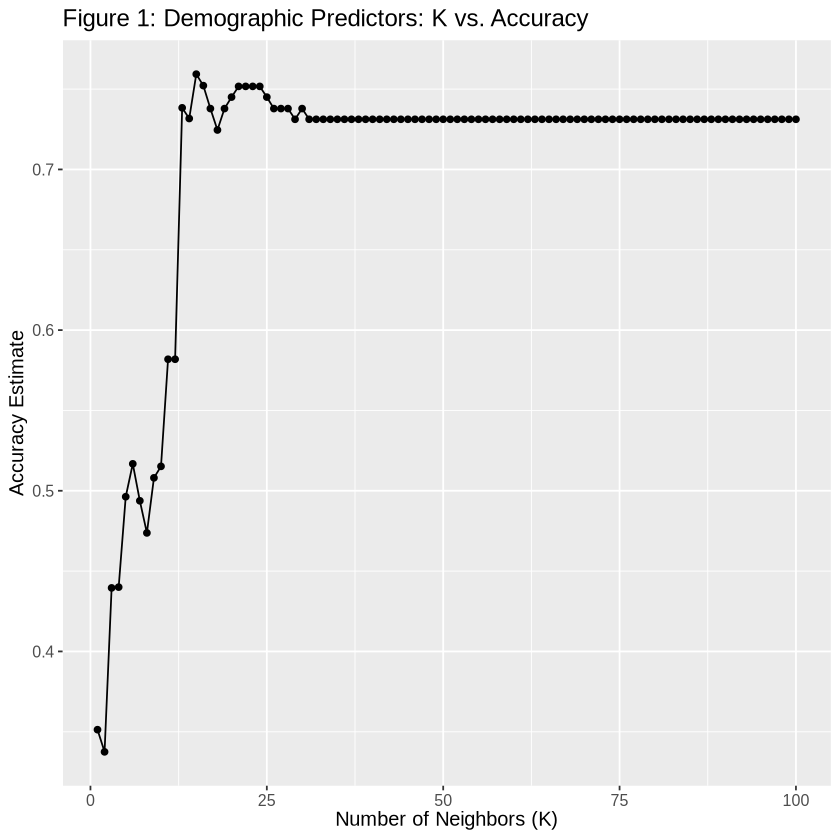

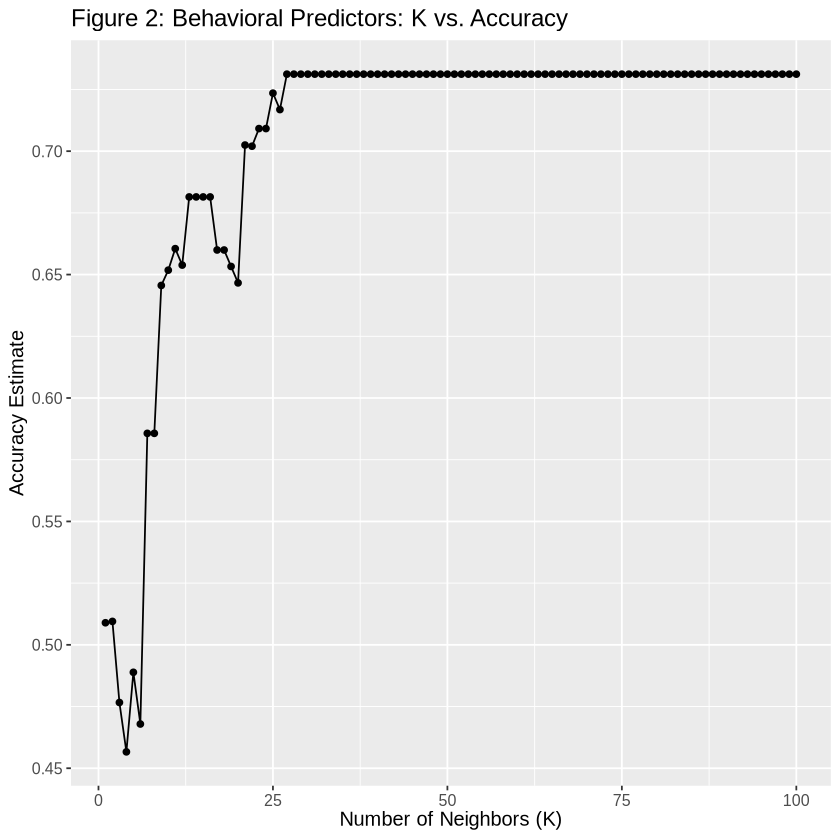

In [54]:
# Plot: Accuracy vs. K for Demographic Predictors
demo_accuracy_vs_k <- ggplot(knn_demo_accuracy_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(
    title = "Figure 1: Demographic Predictors: K vs. Accuracy",
    x = "Number of Neighbors (K)",
    y = "Accuracy Estimate"
  ) +
  theme(text = element_text(size = 12))

demo_accuracy_vs_k

# Plot: Accuracy vs. K for Behavioral Predictors
behavior_accuracy_vs_k <- ggplot(knn_behavior_accuracy_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(
    title = "Figure 2: Behavioral Predictors: K vs. Accuracy",
    x = "Number of Neighbors (K)",
    y = "Accuracy Estimate"
  ) +
  theme(text = element_text(size = 12))

behavior_accuracy_vs_k

### 2.12 Final Model Construction Using Optimal K

Using the best K values determined from the tuning step, we constructed our final K-Nearest Neighbors models for both the demographic and behavioral predictor groups.

- **Model Specification:**  
  We used `nearest_neighbor()` to define the KNN model with a `"rectangular"` weighting function and set the number of neighbors (`neighbors`) to the optimal K value identified from tuning (`demo_best_k` and `behavior_best_k` respectively). The model was set to `"classification"` mode and the `"kknn"` engine was used to support weighted KNN.

- **Workflow Construction and Fitting:**  
  We combined the final model specification with the corresponding recipe using `workflow()`, and then trained each model using the respective training datasets (`players_demo_training` and `players_behavior_training`). This allows us to apply preprocessing and modeling consistently and reproducibly in a single step for each group.

This step prepares us to evaluate the final performance of each model on the unseen testing data using the tuned and optimized configuration.


In [ ]:
#test set evaluation

knn_demo_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = demo_best_k) |>
    set_engine("kknn")|>
    set_mode("classification")

knn_demo_fit <- workflow() |>
    add_recipe(recipe_demo) |>
    add_model (knn_demo_spec) |>
    fit(data = players_demo_training)

knn_demo_fit

knn_behavior_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = behavior_best_k) |>
    set_engine("kknn")|>
    set_mode("classification")

knn_behavior_fit <- workflow() |>
    add_recipe(recipe_behavior) |>
    add_model (knn_behavior_spec) |>
    fit(data = players_behavior_training)

knn_behavior_fit

### 2.13 Evaluating Model Performance: Accuracy, Precision, and Recall

In [60]:
players_demo_final_accuracy_predictions <- predict(knn_demo_fit, players_demo_testing) |>
    bind_cols(players_demo_testing)|>
    metrics(truth = subscribe, estimate = .pred_class)|>
    filter(.metric == "accuracy")
players_demo_final_accuracy_predictions

players_behavior_final_accuracy_predictions <- predict(knn_behavior_fit, players_behavior_testing) |>
    bind_cols(players_behavior_testing)|>
    metrics(truth = subscribe, estimate = .pred_class)|>
    filter(.metric == "accuracy")
players_behavior_final_accuracy_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7755102


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


In [62]:
# Make sure your prediction tibble has both truth and prediction
players_demo_predictions <- predict(knn_demo_fit, players_demo_testing) |>
  bind_cols(players_demo_testing)

players_behavior_predictions <- predict(knn_behavior_fit, players_behavior_testing) |>
  bind_cols(players_behavior_testing)

# Calculate precision and recall for demo-based model
precision(players_demo_predictions, truth = subscribe, estimate = .pred_class, event_level = "first")
recall(players_demo_predictions, truth = subscribe, estimate = .pred_class, event_level = "first")

# Calculate precision and recall for behavior-based model
precision(players_behavior_predictions, truth = subscribe, estimate = .pred_class, event_level = "first")
recall(players_behavior_predictions, truth = subscribe, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6666667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3076923


Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 13 true event(s) actually occurred for the problematic event level,
FALSE”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,NA


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0


### 2.13.1 Observation: Results Summary
- While the **demographic** model has shown an increase in accuracy from **73.47%** to **77.55%**, the **behavioral** model's accuracy remains the same as before tuning at **73.47%**.
- While the **demographic** model has a precision of **66.67%**, **Precision is NA** for the **behavioral** model
  A warning appeared when computing the precision of the **behaviour** model:  
  _"While computing binary `precision()`, no predicted events were detected (i.e. `true_positive + false_positive = 0`). Precision is undefined in this case."_  
  This warning tells us the models **predicted every player as a subscriber (`TRUE`)**, and therefore never predicted any `FALSE` (non-subscribers), making it impossible to calculate meaningful precision. The potential cause will be addressed in the later discussion section.
- Despite the **demographic** model has a low recall of **30.77%**, **recall is 0** for the **behavioral** model.

### 2.14 Confusion Matrix 


To evaluate how well each of our KNN classification models predicts player subscription status (`subscribe`), we used **confusion matrices**. While accuracy alone can provide a general idea of model performance, it may be misleading—especially when class imbalance is present (e.g., more players are subscribed than not).

A **confusion matrix** gives us a more detailed picture by showing:

- **True Positives (TP)**: Correctly predicted subscribers
- **True Negatives (TN)**: Correctly predicted non-subscribers
- **False Positives (FP)**: Non-subscribers incorrectly predicted as subscribers
- **False Negatives (FN)**: Subscribers incorrectly predicted as non-subscribers

By comparing confusion matrices across both the **demographic-based** and **behavioral-based** models, we can assess which model is better at capturing the actual pattern of subscriptions, and where each model may be falling short.

This step is crucial to ensure the model doesn’t just have high accuracy by chance or imbalance, but is genuinely learning meaningful patterns from the data.


In [64]:
demo_preds <- predict(knn_demo_fit, players_demo_testing) |> 
  bind_cols(players_demo_testing)

behavior_preds <- predict(knn_behavior_fit, players_behavior_testing) |> 
  bind_cols(players_behavior_testing)

# Confusion matrix for demographics
conf_mat_demo <- conf_mat(demo_preds, truth = subscribe, estimate = .pred_class)
conf_mat_demo

# Confusion matrix for behavior
conf_mat_behavior <- conf_mat(behavior_preds, truth = subscribe, estimate = .pred_class)
conf_mat_behavior

          Truth
Prediction FALSE TRUE
     FALSE     4    2
     TRUE      9   34

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     13   36

### 2.14.1 Confusion Matrix Analysis

After fitting the final tuned KNN models on the demographic and behavioral datasets, we evaluated their performance on the testing sets using confusion matrices.

#### Demographic Model

|              | Actual FALSE | Actual TRUE |
|--------------|--------------|-------------|
| Predicted FALSE | 4            | 2           |
| Predicted TRUE  | 9            | 34          |

- **True Positives (TP)**: 34 — correctly predicted subscriptions  
- **True Negatives (TN)**: 4 — correctly predicted non-subscriptions  
- **False Positives (FP)**: 9 — predicted subscription when it was actually false  
- **False Negatives (FN)**: 2 — missed subscriptions  

This model shows a reasonable ability to classify both subscribed and non-subscribed users. While the number of false positives is somewhat high, the model still captures most of the actual subscribers. Precision and recall will be more balanced in this case.

#### Behavioral Model

|              | Actual FALSE | Actual TRUE |
|--------------|--------------|-------------|
| Predicted FALSE | 0            | 0           |
| Predicted TRUE  | 13           | 36          |

- **True Positives (TP)**: 36  
- **True Negatives (TN)**: 0  
- **False Positives (FP)**: 13  
- **False Negatives (FN)**: 0  

This model predicts **all cases as TRUE**, meaning it fails to identify any non-subscriber. Therefore, it is **biased and not reliable**
